# Principal Components Analysis Nutrition Exercise
En este ejercicio no vas a montar ningún modelo de Machine Learning supervisado, sino aprenderás a trabajar con PCA: pretratar el dato antes de calcular sus PCs, interpretarlos, graficar y escoger número de componentes según varianza.

Importa las librerías necesarias

In [1]:
'''
Que es el PCA?
Imagina que tienes una escultura en 3D  (largo, ancho, alto) y quieres tomarle una sola 
foto (2D) que capture la mayor cantidad de detalles posible.
    - Si tomas la foto desde arriba, quizas solo veas un circulo (pierdes info)
    - Si la tomas de frente, ves la forma completa 
PCA hace exactamente eso con los datos:
1. Toma un dataset con muchas columnas (dimensiones).
2. Busca el 'mejor angulo' para mirarlos 
3. Aplana los datos en menos columnas (componentes principales) tratando de perder 
la menor cantidad de informacion posible
'''

"\nQue es el PCA?\nImagina que tienes una escultura en 3D  (largo, ancho, alto) y quieres tomarle una sola \nfoto (2D) que capture la mayor cantidad de detalles posible.\n    - Si tomas la foto desde arriba, quizas solo veas un circulo (pierdes info)\n    - Si la tomas de frente, ves la forma completa \nPCA hace exactamente eso con los datos:\n1. Toma un dataset con muchas columnas (dimensiones).\n2. Busca el 'mejor angulo' para mirarlos \n3. Aplana los datos en menos columnas (componentes principales) tratando de perder \nla menor cantidad de informacion posible\n"

In [2]:

import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')


from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale




### Importa los datos
1. Importa los datos: *nndb.csv*
2. Observa las columnas que hay, así como su tipo.

In [3]:
df = pd.read_csv(r'C:\Users\joseb\Documents\the_bridge\ONLINE_DS_THEBRIDGE_jbenegasb\modulo_1\2509_dsft_thebridge\3-Machine Learning\2-No_Supervisado\2-PCA\Practica\data\nndb_flat.csv')
df.head()

,ID,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN,876.0,0.28,99.48,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN,353.0,21.40,28.74,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN,371.0,23.24,29.68,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364


In [4]:
pd.set_option('display.max_columns', None)

In [5]:
# info del df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                8618 non-null   int64  
 1   FoodGroup         8618 non-null   object 
 2   ShortDescrip      8618 non-null   object 
 3   Descrip           8618 non-null   object 
 4   CommonName        1063 non-null   object 
 5   MfgName           1560 non-null   object 
 6   ScientificName    732 non-null    object 
 7   Energy_kcal       8618 non-null   float64
 8   Protein_g         8618 non-null   float64
 9   Fat_g             8618 non-null   float64
 10  Carb_g            8618 non-null   float64
 11  Sugar_g           8618 non-null   float64
 12  Fiber_g           8618 non-null   float64
 13  VitA_mcg          8618 non-null   float64
 14  VitB6_mg          8618 non-null   float64
 15  VitB12_mcg        8618 non-null   float64
 16  VitC_mg           8618 non-null   float64


In [6]:
# describe del df
df.describe()

,ID,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,VitE_mg,Folate_mcg,Niacin_mg,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
count,8618.000000,8618.000000,8618.00000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000
mean,15467.757368,226.438617,11.52391,10.647024,21.819062,6.560253,2.023242,93.968786,0.264369,1.225260,7.925377,0.872329,50.306104,3.411560,0.237248,0.209857,73.411348,0.172181,2.696771,32.745301,0.504439,155.986308,12.614945,1.970216,0.104410,0.155511,0.510525,0.088060,0.058155,0.125765,0.213222,0.182499,0.174881,0.061176,0.000191,0.077965,0.222838,0.229363,0.179111
std,9221.428766,169.388910,10.55059,15.866353,27.239000,13.602098,4.313670,779.362205,0.478614,4.319183,57.582758,3.849028,186.560653,4.834572,0.449880,0.518369,201.363662,0.553052,5.726967,56.068454,6.383438,203.093234,28.292347,3.358213,0.865958,0.281538,1.799659,0.639808,0.256602,0.466402,0.302161,0.346062,0.431974,0.167803,0.000615,0.133496,0.290133,0.514406,0.305292
min,1001.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8695.250000,93.000000,2.47000,0.992500,0.040000,0.000000,0.000000,0.000000,0.034250,0.000000,0.000000,0.000000,0.000000,0.382000,0.046000,0.030000,9.000000,0.030000,0.530000,10.000000,0.000000,37.000000,0.100000,0.230000,0.000000,0.020147,0.000000,0.000000,0.000000,0.000000,0.023875,0.035385,0.025000,0.007500,0.000033,0.023810,0.052857,0.001818,0.020909
50%,14273.000000,191.000000,8.28500,5.235000,8.945000,0.370000,0.300000,1.500000,0.120000,0.080000,0.000000,0.110000,7.000000,2.100000,0.150000,0.077500,19.000000,0.079000,1.330000,20.000000,0.022000,133.000000,3.900000,0.845000,0.001667,0.070588,0.033333,0.000000,0.007333,0.017500,0.131250,0.115385,0.064583,0.015833,0.000088,0.047619,0.190000,0.070909,0.076818
75%,20050.750000,336.000000,19.97750,13.900000,32.900000,5.300000,2.400000,21.000000,0.355000,1.297500,2.500000,0.450000,25.000000,5.029250,0.260000,0.223000,62.000000,0.144750,2.580000,29.000000,0.222000,216.000000,21.300000,2.700000,0.023333,0.208824,0.540625,0.027778,0.030000,0.062500,0.314328,0.200000,0.185833,0.051667,0.000161,0.069048,0.308571,0.387273,0.245455
max,93600.000000,902.000000,88.32000,100.000000,100.000000,99.800000,79.000000,30000.000000,12.000000,98.890000,2400.000000,149.400000,5881.000000,127.500000,17.500000,23.375000,7364.000000,15.050000,123.600000,781.000000,328.000000,9918.000000,1917.000000,90.950000,33.333333,7.058824,41.204167,26.666667,9.960000,14.702500,7.968750,13.461538,19.479167,6.136667,0.016722,1.859524,14.168571,34.854545,8.268182


In [7]:
df.columns[8:13]

Index(['Protein_g', 'Fat_g', 'Carb_g', 'Sugar_g', 'Fiber_g'], dtype='object')

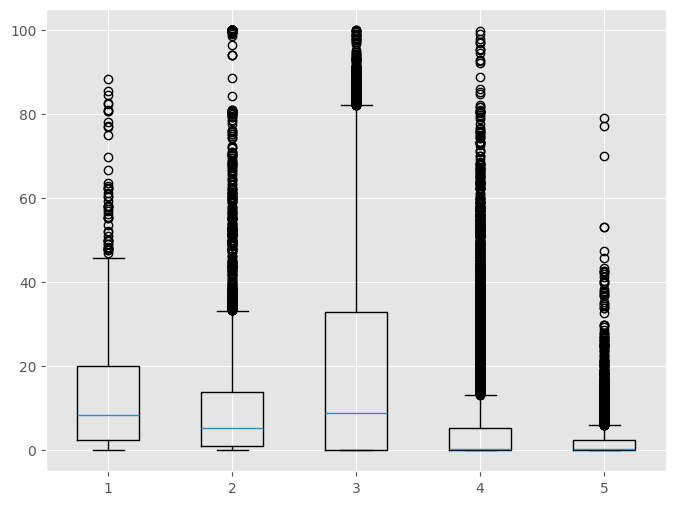

In [8]:
plt.figure(figsize=(8,6))
plt.boxplot(x=df[['Protein_g', 'Fat_g', 'Carb_g', 'Sugar_g', 'Fiber_g']])
plt.show()

In [9]:

# boxplot de las columnas 8 a 13

### Mira a ver la correlación entre las variables numéricas
¿Qué pasa con las columnas USRDA? ¿Hay que tomar alguna decisión?

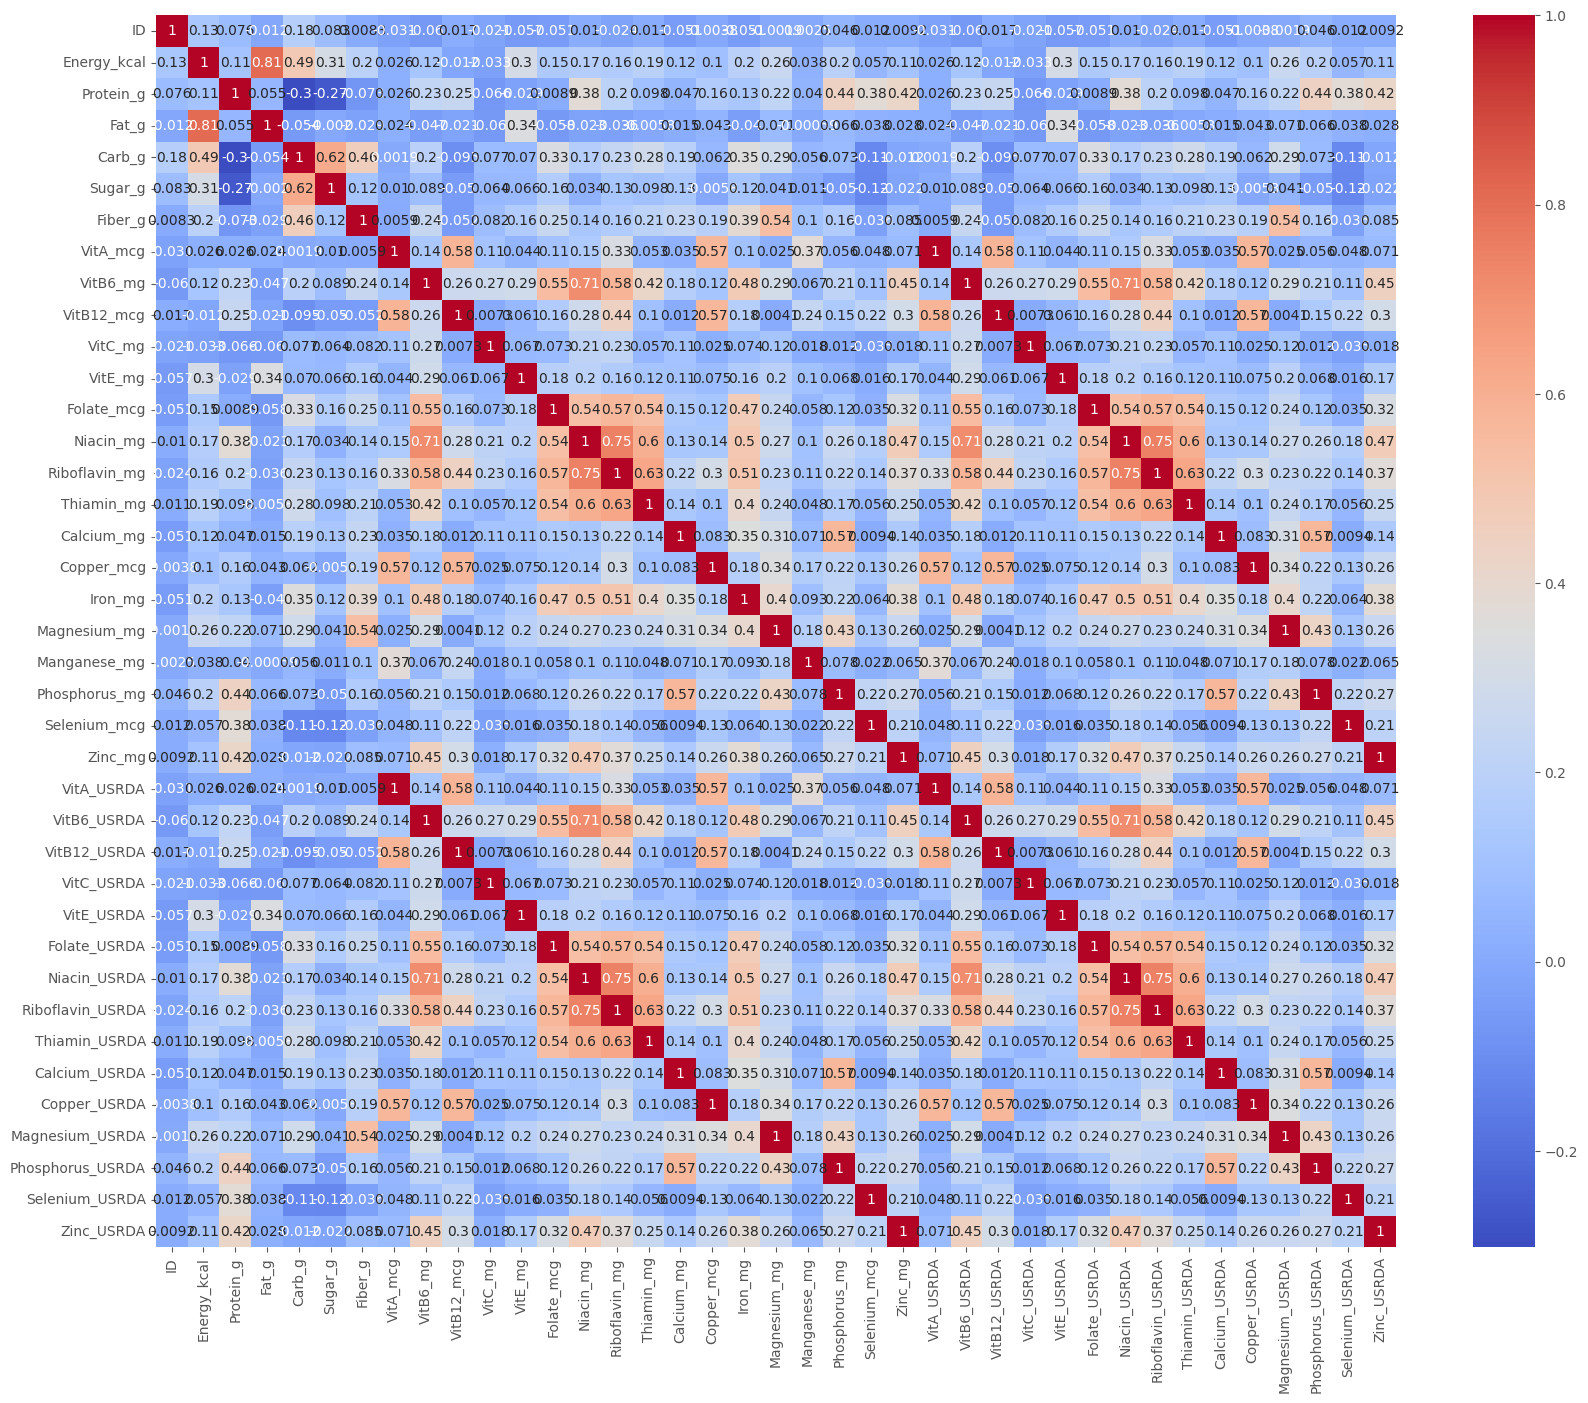

In [10]:
import seaborn as sns
plt.figure(figsize=(20,16))
sns.heatmap(
    data= df.corr(numeric_only=True),
    annot=True,
    cmap='coolwarm'
)
plt.show()
# heatmap para la correlación de Pearson con las columnas numéricas

In [11]:

# columnas que contienen USRDA en su nombre
columnas_usrda = [ col for col in df.columns if 'USRDA' in col]
print(columnas_usrda)

['VitA_USRDA', 'VitB6_USRDA', 'VitB12_USRDA', 'VitC_USRDA', 'VitE_USRDA', 'Folate_USRDA', 'Niacin_USRDA', 'Riboflavin_USRDA', 'Thiamin_USRDA', 'Calcium_USRDA', 'Copper_USRDA', 'Magnesium_USRDA', 'Phosphorus_USRDA', 'Selenium_USRDA', 'Zinc_USRDA']


In [12]:
df = df.drop(['VitA_USRDA', 'VitB6_USRDA', 'VitB12_USRDA', 'VitC_USRDA', 'VitE_USRDA', 'Folate_USRDA', 'Niacin_USRDA', 'Riboflavin_USRDA', 'Thiamin_USRDA', 'Calcium_USRDA', 'Copper_USRDA', 'Magnesium_USRDA', 'Phosphorus_USRDA', 'Selenium_USRDA', 'Zinc_USRDA'], axis=1)
df.head()
# elimino las columnas que contienen USRDA por colinealidad

,ID,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,VitE_mg,Folate_mcg,Niacin_mg,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,2.32,3.0,0.042,0.034,0.005,24.0,0.000,0.02,2.0,0.000,24.0,1.0,0.09
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,2.32,3.0,0.042,0.034,0.005,24.0,0.016,0.16,2.0,0.004,23.0,1.0,0.05
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,2.80,0.0,0.003,0.005,0.001,4.0,0.001,0.00,0.0,0.000,3.0,0.0,0.01
3,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,0.25,36.0,1.016,0.382,0.029,528.0,0.040,0.31,23.0,0.009,387.0,14.5,2.66
4,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,0.26,20.0,0.118,0.351,0.014,674.0,0.024,0.43,24.0,0.012,451.0,14.5,2.60


### Variables no numéricas
Elimina las variables de texto del dataset

In [13]:
df_numeric = df.select_dtypes(include=[np.number])
if 'ID' in df.columns:
    df_numeric = df_numeric.set_index(df['ID'])
    if 'ID' in df_numeric.columns:
        df_numeric = df_numeric.drop(columns=['ID'])

df_numeric.head()

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,VitE_mg,Folate_mcg,Niacin_mg,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg
ID,,,,,,,,,,,,,,,,,,,,,,,
1001,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,2.32,3.0,0.042,0.034,0.005,24.0,0.000,0.02,2.0,0.000,24.0,1.0,0.09
1002,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,2.32,3.0,0.042,0.034,0.005,24.0,0.016,0.16,2.0,0.004,23.0,1.0,0.05
1003,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,2.80,0.0,0.003,0.005,0.001,4.0,0.001,0.00,0.0,0.000,3.0,0.0,0.01
1004,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,0.25,36.0,1.016,0.382,0.029,528.0,0.040,0.31,23.0,0.009,387.0,14.5,2.66
1005,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,0.26,20.0,0.118,0.351,0.014,674.0,0.024,0.43,24.0,0.012,451.0,14.5,2.60


In [14]:
# miro el dtypes
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8618 entries, 1001 to 93600
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Energy_kcal    8618 non-null   float64
 1   Protein_g      8618 non-null   float64
 2   Fat_g          8618 non-null   float64
 3   Carb_g         8618 non-null   float64
 4   Sugar_g        8618 non-null   float64
 5   Fiber_g        8618 non-null   float64
 6   VitA_mcg       8618 non-null   float64
 7   VitB6_mg       8618 non-null   float64
 8   VitB12_mcg     8618 non-null   float64
 9   VitC_mg        8618 non-null   float64
 10  VitE_mg        8618 non-null   float64
 11  Folate_mcg     8618 non-null   float64
 12  Niacin_mg      8618 non-null   float64
 13  Riboflavin_mg  8618 non-null   float64
 14  Thiamin_mg     8618 non-null   float64
 15  Calcium_mg     8618 non-null   float64
 16  Copper_mcg     8618 non-null   float64
 17  Iron_mg        8618 non-null   float64
 18  Magnesium

In [15]:
# muestro todas las columnas numéricas
df_numeric.head()

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,VitE_mg,Folate_mcg,Niacin_mg,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg
ID,,,,,,,,,,,,,,,,,,,,,,,
1001,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,2.32,3.0,0.042,0.034,0.005,24.0,0.000,0.02,2.0,0.000,24.0,1.0,0.09
1002,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,2.32,3.0,0.042,0.034,0.005,24.0,0.016,0.16,2.0,0.004,23.0,1.0,0.05
1003,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,2.80,0.0,0.003,0.005,0.001,4.0,0.001,0.00,0.0,0.000,3.0,0.0,0.01
1004,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,0.25,36.0,1.016,0.382,0.029,528.0,0.040,0.31,23.0,0.009,387.0,14.5,2.66
1005,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,0.26,20.0,0.118,0.351,0.014,674.0,0.024,0.43,24.0,0.012,451.0,14.5,2.60


### Distribuciones
Muchas de las variables tienen asimetría hacia la derecha. Deberíamos transformarlas para conseguir distribuciones normales y mejorar las correlaciones de cara al PCA y a futuros modelos lineales que vayamos a probar. Transforma todas las variables realizando una transformación Logarítmica.

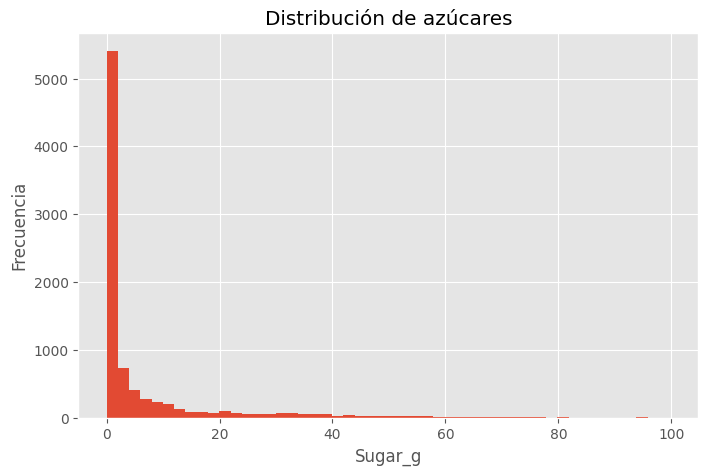

In [16]:
plt.figure(figsize=(8,5))
plt.hist(df_numeric['Sugar_g'], bins=50)
plt.xlabel('Sugar_g')
plt.ylabel('Frecuencia')
plt.title('Distribución de azúcares')
plt.show()

In [17]:

# histograma de Sugar_g

In [18]:

# calculo el skew de sugar_g
skew_sugar = df_numeric['Sugar_g'].skew()

skew_sugar

np.float64(2.9533244194378163)

In [19]:
np.log(0+1)

np.float64(0.0)

In [20]:
np.log1p(0) # entiende qué hace log1p en lugar de log

np.float64(0.0)

In [21]:

    
# aplico una transformación logarítmica a todas las columnas numéricas para estabilizar la varianza (acercar outliers)
df_log = np.log1p(df_numeric)   # log(x + 1)

df_log.head()

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,VitE_mg,Folate_mcg,Niacin_mg,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg
ID,,,,,,,,,,,,,,,,,,,,,,,
1001,6.576470,0.615186,4.408060,0.058269,0.058269,0.0,6.529419,0.002996,0.157004,0.0,1.199965,1.386294,0.041142,0.033435,0.004988,3.218876,0.000000,0.019803,1.098612,0.000000,3.218876,0.693147,0.086178
1002,6.576470,0.615186,4.408060,0.058269,0.058269,0.0,6.529419,0.002996,0.122218,0.0,1.199965,1.386294,0.041142,0.033435,0.004988,3.218876,0.015873,0.148420,1.098612,0.003992,3.178054,0.693147,0.048790
1003,6.776507,0.246860,4.609959,0.000000,0.000000,0.0,6.734592,0.001000,0.009950,0.0,1.335001,0.000000,0.002996,0.004988,0.001000,1.609438,0.001000,0.000000,0.000000,0.000000,1.386294,0.000000,0.009950
1004,5.869297,3.109061,3.392493,1.205971,0.405465,0.0,5.293305,0.153579,0.797507,0.0,0.223144,3.610918,0.701115,0.323532,0.028587,6.270988,0.039221,0.270027,3.178054,0.008960,5.961005,2.740840,1.297463
1005,5.918894,3.188004,3.423611,1.332366,0.412110,0.0,5.680173,0.062975,0.815365,0.0,0.231112,3.044522,0.111541,0.300845,0.013903,6.514713,0.023717,0.357674,3.218876,0.011929,6.113682,2.740840,1.280934


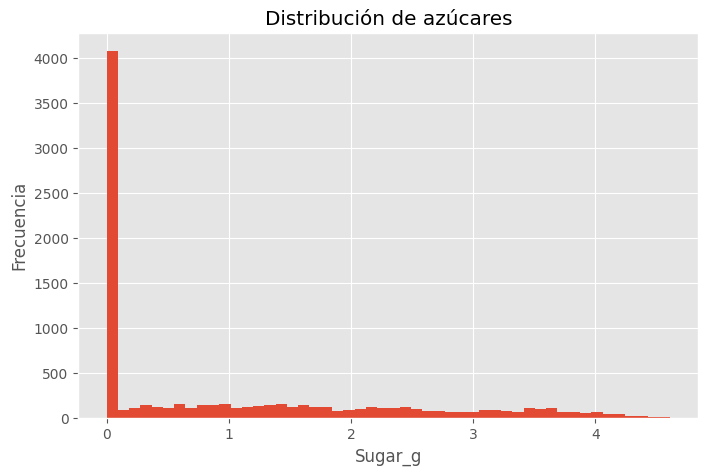

In [22]:
plt.figure(figsize=(8,5))
plt.hist(df_log['Sugar_g'], bins=50)
plt.xlabel('Sugar_g')
plt.ylabel('Frecuencia')
plt.title('Distribución de azúcares')
plt.show()

In [23]:

# histograma de Sugar_g

In [24]:

# asimetría (skew) de Sugar_g
np.float64(skew_sugar)

np.float64(2.9533244194378163)

### Estandarizado
Estandariza cada variable.

No es necesario que dividas en train y test.

In [36]:

'''
Este es el paso donde se suele fallar. El PCA es sensible a la escala. Imagina que tienes dos columnas:
-vitamina c: Valores de 0.0001 a 0.1 gramos
-calorias: Valores de 50 a 800 
Si no escalas los datos, el PCA pensara que las Calorias son 10,000 veces 
mas importantes oslo porque los numeros son mas grandes.
Hay que aplicar el StandardScaler

'''
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_log)  
df_x_scaled = pd.DataFrame(X_scaled)

df_x_scaled, df_x_scaled.shape

(            0         1         2         3         4         5         6   \
 0     1.540414 -1.379699  2.222526 -1.279339 -0.751381 -0.817818  2.363105   
 1     1.540414 -1.379699  2.222526 -1.279339 -0.751381 -0.817818  2.363105   
 2     1.745661 -1.728220  2.393490 -1.315522 -0.796963 -0.817818  2.463472   
 3     0.814824  0.980084  1.362565 -0.566664 -0.479778 -0.817818  1.758419   
 4     0.865713  1.054782  1.388915 -0.488178 -0.474580 -0.817818  1.947668   
 ...        ...       ...       ...       ...       ...       ...       ...   
 8613  0.665317  0.848892  1.252011 -1.315522 -0.796963 -0.817818  1.062751   
 8614 -0.365945  0.943039 -0.993791 -0.161868 -0.796963 -0.817818 -0.293552   
 8615  0.536895 -1.961806 -1.510128  1.358297  2.572113 -0.817818 -0.830974   
 8616 -0.578992  0.724618 -0.768799 -0.633329 -0.796963 -0.817818  0.848873   
 8617 -0.590329  0.909960 -1.166789 -1.315522 -0.796963 -0.817818  0.848873   
 
             7         8        9         10      

### Implementación del PCA
Prueba a montar un PCA con todos los componentes. Para ello utiliza los datos previamente transformados y escalados.

In [37]:
df_x_scaled.shape
#shape del df

(8618, 23)

In [45]:
pca = PCA(n_components=23)

X_pca = pca.fit_transform(df_x_scaled)

df_X_pca = pd.DataFrame(X_pca)

df_X_pca.shape




# PCA con 23 componentes
# ajustado con el df escalado
# miro el shape

(8618, 23)

### Aportación de cada PCA
Visualiza en un diagrama de líneas la suma acumulada de la varianza explicativa del PCA.

Si tuviéses que quedarte con 70-75 % de la varianza original, ¿con cuántos Principal Components te quedarías?

In [46]:
explained = pca.explained_variance_ratio_
cum_explained = np.cumsum(explained)

n70 = np.argmax(cum_explained >= 0.70) + 1
n75 = np.argmax(cum_explained >= 0.75) + 1

print(f"Componentes necesarios para ≥70% de varianza: {n70}")
print(f"Componentes necesarios para ≥75% de varianza: {n75}")

Componentes necesarios para ≥70% de varianza: 6
Componentes necesarios para ≥75% de varianza: 7


In [47]:

# varianza explicada de cada componente principal
pca.explained_variance_ratio_

array([0.3125111 , 0.16666503, 0.08532219, 0.07111741, 0.05904531,
       0.04487789, 0.03079514, 0.02718658, 0.02537361, 0.02262291,
       0.02194625, 0.01905314, 0.01852623, 0.01432524, 0.01349698,
       0.01297861, 0.01120283, 0.00974457, 0.00929553, 0.00746957,
       0.00693989, 0.00566242, 0.00384157])

In [48]:

# varianza explicada acumulada
np.cumsum(pca.explained_variance_ratio_)

array([0.3125111 , 0.47917612, 0.56449832, 0.63561572, 0.69466103,
       0.73953892, 0.77033406, 0.79752064, 0.82289426, 0.84551716,
       0.86746341, 0.88651656, 0.90504278, 0.91936803, 0.93286501,
       0.94584362, 0.95704645, 0.96679102, 0.97608654, 0.98355611,
       0.99049601, 0.99615843, 1.        ])

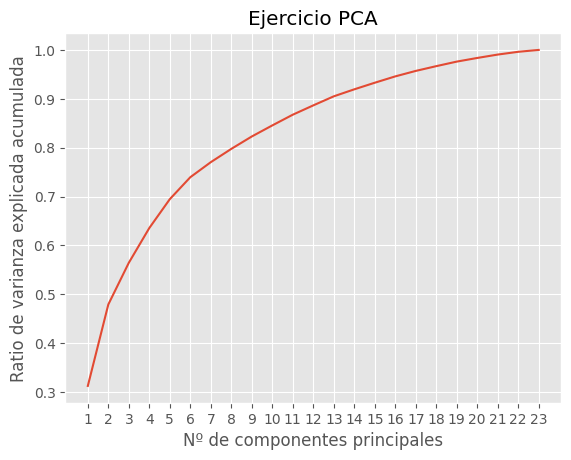

In [49]:
plt.plot(pd.Series(pca.explained_variance_ratio_.cumsum(), index=np.arange(1,24)))
plt.xlabel("Nº de componentes principales")
plt.ylabel("Ratio de varianza explicada acumulada")
plt.title("Ejercicio PCA")
plt.xticks(np.arange(1,24));

## Feat. Red
Crea un nuevo PCA con X Principal Components, siendo X la cantidad de PC escogidos en el apartado anterior.

Obtén el nuevo dataset con el mismo número de registros que el original, pero en este caso con X features, que representan los PC elegidos.

In [52]:
X_components = 6 
pca_red = PCA(n_components=X_components)

# con 6 componentes principales
# ajusto y transformo con la PCA
X_pca = pca_red.fit_transform(X_scaled)
# miro el shape
df_X_pca = pd.DataFrame(X_pca)
df_X_pca.shape

(8618, 6)

In [53]:
df_pca = pd.DataFrame(X_pca, columns=[f"PC{i+1}" for i in range(X_components)])

df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,-2.139032,-0.968019,1.463988,0.270872,4.066991,0.307222
1,-2.106485,-0.909501,1.480580,0.263240,4.032459,0.348613
2,-3.267830,-1.138430,2.042335,1.175421,4.071722,1.326607
3,1.525964,-1.264102,-0.136013,-0.929808,2.430444,-2.095054
4,1.240712,-1.204120,-0.004729,-1.192002,2.691725,-2.341876


### ¿Qué grupo de comida tiene los valores más altos en cada categoría?
Determina para cada Principal Component, los 3 grupos de comida (*FoodGroup*) con los valores del PC más altos.

In [57]:
df_pca['FoodGroup'] = df['FoodGroup'].values
df_pca

,PC1,PC2,PC3,PC4,PC5,PC6,FoodGroup
0,-2.139032,-0.968019,1.463988,0.270872,4.066991,0.307222,Dairy and Egg Products
1,-2.106485,-0.909501,1.480580,0.263240,4.032459,0.348613,Dairy and Egg Products
2,-3.267830,-1.138430,2.042335,1.175421,4.071722,1.326607,Dairy and Egg Products
3,1.525964,-1.264102,-0.136013,-0.929808,2.430444,-2.095054,Dairy and Egg Products
4,1.240712,-1.204120,-0.004729,-1.192002,2.691725,-2.341876,Dairy and Egg Products
...,...,...,...,...,...,...,...
8613,2.553661,-2.548700,-0.472185,-0.109428,2.716513,0.018570,Finfish and Shellfish Products
8614,0.075018,-1.840922,-0.935725,-1.348908,-0.392092,-0.759672,Finfish and Shellfish Products
8615,-2.930529,1.664405,1.242070,1.172396,-0.915550,-0.885902,Sweets
8616,1.118895,-0.780834,-0.805126,-1.581838,1.641702,1.090002,Finfish and Shellfish Products


In [59]:
pcs = [col for col in df_pca.columns if col.startswith("PC")]

top3_by_pc = {}

for pc in pcs:
    # Agrupar por FoodGroup → media del PC
    means = df_pca.groupby("FoodGroup")[pc].mean()
    
    # Ordenar de mayor a menor
    top3 = means.sort_values(ascending=False).head(3)
    
    top3_by_pc[pc] = top3

# Mostrar resultados
for pc, top3 in top3_by_pc.items():
    print(f"\nTop 3 grupos con valores más altos en {pc}:")
    display(top3)



Top 3 grupos con valores más altos en PC1:


FoodGroup
Breakfast Cereals        4.020261
Nut and Seed Products    3.120684
Spices and Herbs         2.562117
Name: PC1, dtype: float64


Top 3 grupos con valores más altos en PC2:


FoodGroup
Spices and Herbs         3.647736
Breakfast Cereals        2.748076
Nut and Seed Products    2.267573
Name: PC2, dtype: float64


Top 3 grupos con valores más altos en PC3:


FoodGroup
Fats and Oils            2.333724
Baked Products           1.727793
Nut and Seed Products    1.241486
Name: PC3, dtype: float64


Top 3 grupos con valores más altos en PC4:


FoodGroup
Breakfast Cereals    2.265027
Fats and Oils        1.045026
Beverages            0.545486
Name: PC4, dtype: float64


Top 3 grupos con valores más altos en PC5:


FoodGroup
Fats and Oils             2.634166
Dairy and Egg Products    1.555680
Baby Foods                0.929960
Name: PC5, dtype: float64


Top 3 grupos con valores más altos en PC6:


FoodGroup
Fats and Oils            2.054032
Nut and Seed Products    1.762298
Spices and Herbs         1.461075
Name: PC6, dtype: float64